**1. Collecting Data**

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = yf.download(tickers='AAPL', start='2023-09-1', end = '2024-09-1',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.shape

(251, 6)

In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-09-01,189.490005,189.919998,188.279999,189.460007,188.495468,45732600
2023-09-05,188.279999,189.979996,187.610001,189.699997,188.734222,45280000
2023-09-06,188.399994,188.850006,181.470001,182.910004,181.978806,81755800
2023-09-07,175.179993,178.210007,173.539993,177.559998,176.656021,112488800
2023-09-08,178.350006,180.240005,177.789993,178.179993,177.272858,65551300


**2. Data Preprocessing**

In [ ]:
data.isna().sum()

In [ ]:
data.info()

In [ ]:
# Sorting Indexex
data.sort_index(inplace = True)

In [ ]:
# Data Normalization
scaler = MinMaxScaler();
scaler_values = scaler.fit_transform(data[data.columns])

In [ ]:
scaler_values

In [ ]:
df_scaled = pd.DataFrame(scaler_values , columns = data.columns , index = data.index)
df_scaled.head()

**3. Plotting the Columns**

In [ ]:
plt.rcParams['figure.figsize'] = (15,15)
figure , axes = plt.subplots(6)

for ax , col in zip(axes,df_scaled.columns):
  ax.plot(df_scaled[col])
  ax.set_title(col)
  ax.axes.xaxis.set_visible(False)

**4. Creating the sliding window sequences**

In [ ]:
def create_sequences(data,window_size):
  X = []
  y = []
  for i in range(window_size, len (data)):
    X.append(data.iloc[i-window_size:i].values)
    y.append(data.iloc[i].values)
  return np.array(X) , np.array(y)


In [ ]:
window_size = 60
X , y = create_sequences(df_scaled,window_size)

In [ ]:
X.shape , y.shape

((191, 60, 6), (191, 6))

**5. Train - Test Split**

In [ ]:
X_train , X_test,  y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape[1] , X_train.shape[2]

(60, 6)

**6. LSTM Model**

In [ ]:
model = keras.Sequential([
    # Adding the first layer
    keras.layers.LSTM(units = 50 , return_sequences=True , input_shape = (X_train.shape[1] , X_train.shape[2])),
    keras.layers.Dropout(0.3),
     # Adding the second layer
    keras.layers.LSTM(units = 50 , return_sequences=True),
    keras.layers.Dropout(0.3),
     # Adding the third layer
    keras.layers.LSTM(units = 50 , return_sequences=False),
    keras.layers.Dropout(0.3),
    # Adding output layer
    keras.layers.Dense(y_train.shape[1])
])

In [ ]:
model.compile(optimizer='adam' , loss = 'mean_squared_error' , metrics = ['RootMeanSquaredError'])

In [ ]:
# Early Stopping
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10 , restore_best_weights=True )

In [ ]:
lstm_model = model.fit(X_train , y_train , validation_split=0.2 , epochs = 100 , batch_size = 3 , callbacks=[early_stopping])

In [ ]:
predictions = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


**7. Forecasting the Data**

In [ ]:
# Inverse Scaling
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

In [ ]:
# Plotting the results

plt.figure(figsize=(14,7))

for i,col in enumerate(df_scaled.columns):
  plt.subplot(2,3,i+1)
  plt.plot(y_test_rescaled[:,i] , color = 'blue' , label = f'Actual {col}')
  plt.plot(predictions[:,i] , color = 'red' , label = f'Predicted {col}')
  plt.title(f'{col} Prediction')
  plt.xlabel(f'{col} Price')
  plt.legend()

plt.tight_layout()

Mounted at /content/drive


[*********************100%***********************]  1 of 1 completed


Model loaded from Google Drive!
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 459ms/step


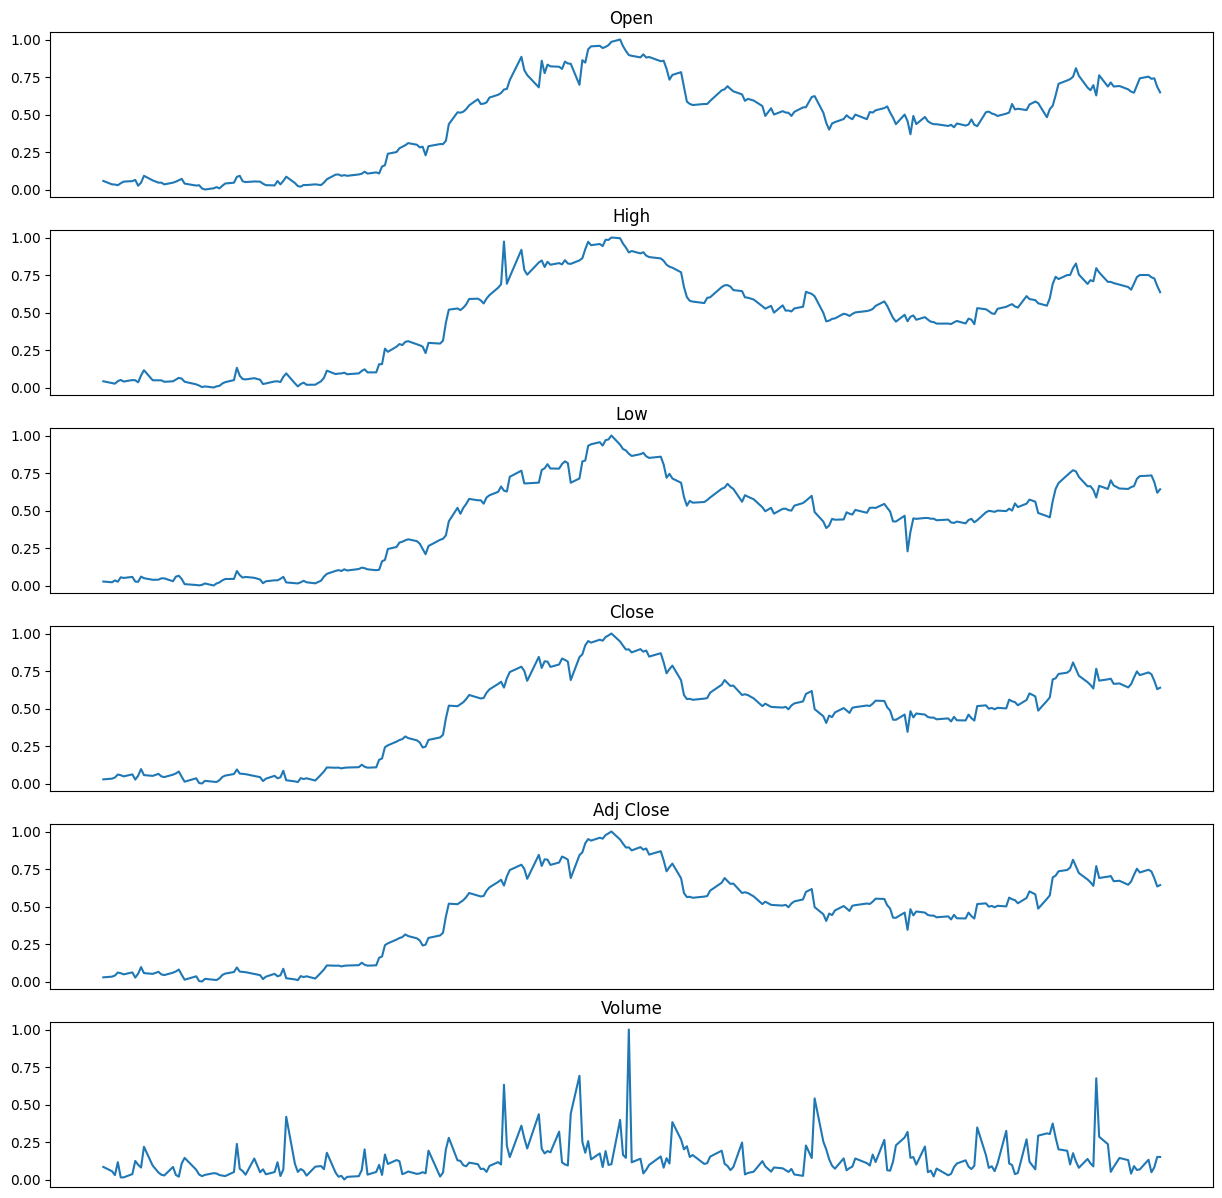

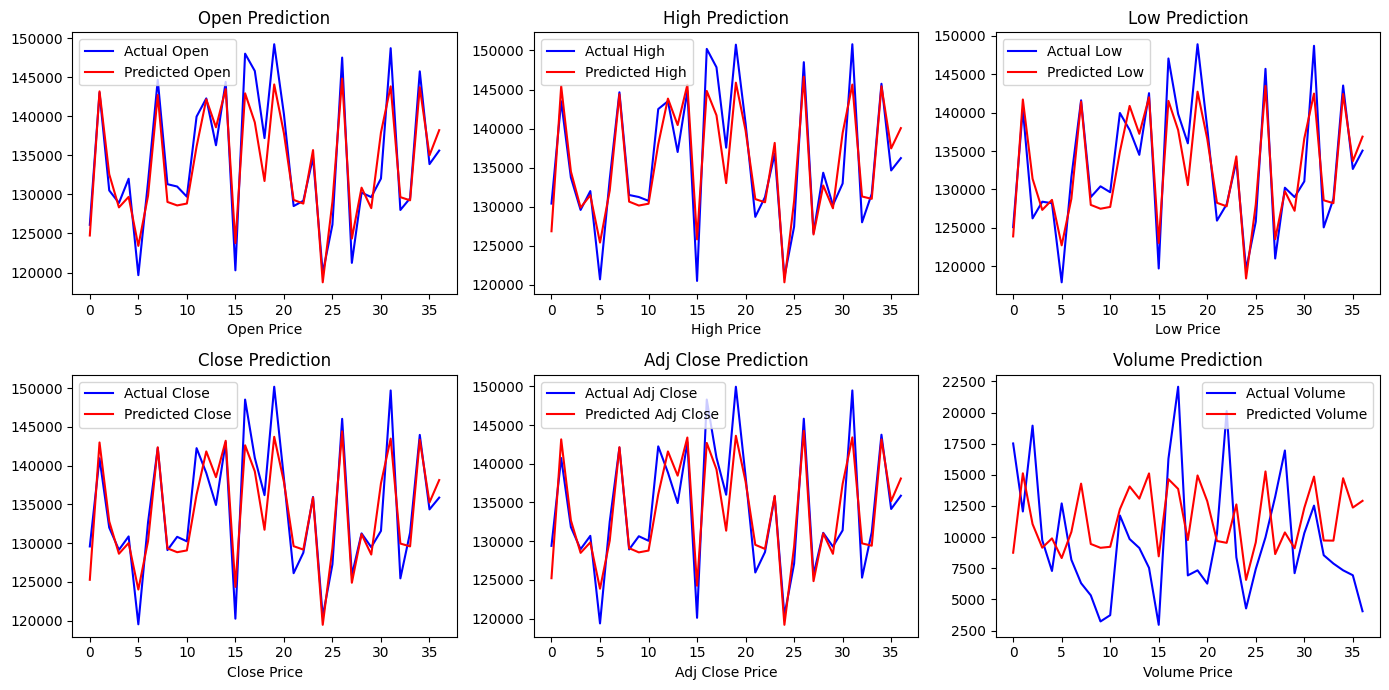

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

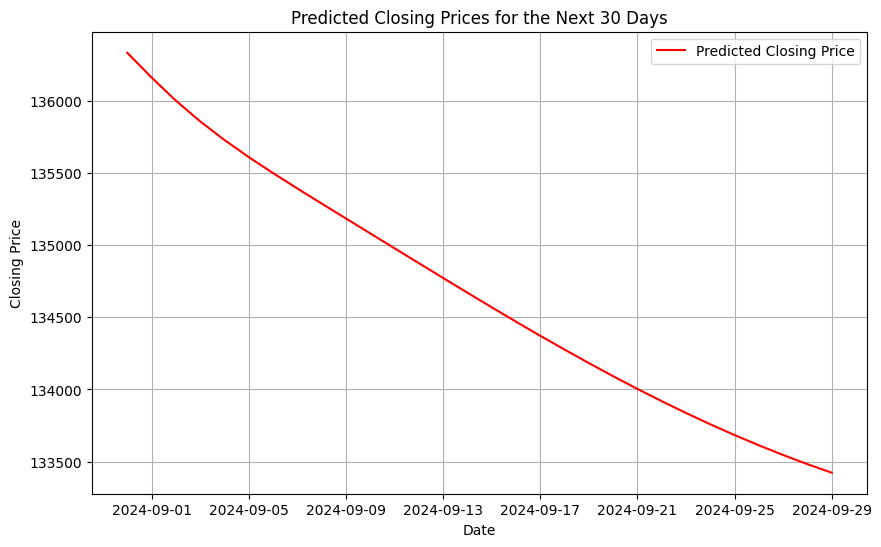

In [ ]:
from google.colab import drive
import os
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

# Mount Google Drive
drive.mount('/content/drive')


tickers = 'MRF.NS'
data = yf.download(tickers=tickers, start='2023-09-1', end='2024-09-1', interval='1d')
data.sort_index(inplace=True)

# Define the path where the model will be saved/loaded
model_path = f'/content/drive/MyDrive/{tickers}.keras'

# Data Normalization
scaler = MinMaxScaler()
scaler_values = scaler.fit_transform(data[data.columns])
df_scaled = pd.DataFrame(scaler_values, columns=data.columns, index=data.index)

# Plot scaled data
plt.rcParams['figure.figsize'] = (15, 15)
figure, axes = plt.subplots(6)
for ax, col in zip(axes, df_scaled.columns):
    ax.plot(df_scaled[col])
    ax.set_title(col)
    ax.axes.xaxis.set_visible(False)

# Create sequences function
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data.iloc[i-window_size:i].values)
        y.append(data.iloc[i].values)
    return np.array(X), np.array(y)

window_size = 60
X, y = create_sequences(df_scaled, window_size)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check if the model exists
if not os.path.exists(model_path):
    # Build the model
    model = keras.Sequential([
        keras.layers.LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(units=50, return_sequences=True),
        keras.layers.Dropout(0.3),
        keras.layers.LSTM(units=50, return_sequences=False),
        keras.layers.Dropout(0.3),
        keras.layers.Dense(y_train.shape[1])
    ])

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['RootMeanSquaredError'])

    # Early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Train the model and save it
    lstm_model = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=3, callbacks=[early_stopping] , verbose = 1)
    model.save(model_path)
    print("Model saved to Google Drive!")
else:
    # Load the trained model from Google Drive
    model = keras.models.load_model(model_path)
    print("Model loaded from Google Drive!")

# Make predictions
predictions = model.predict(X_test)

# Inverse Scaling
predictions = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test)

# Plotting the results
plt.figure(figsize=(14, 7))
for i, col in enumerate(df_scaled.columns):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_test_rescaled[:, i], color='blue', label=f'Actual {col}')
    plt.plot(predictions[:, i], color='red', label=f'Predicted {col}')
    plt.title(f'{col} Prediction')
    plt.xlabel(f'{col} Price')
    plt.legend()

plt.tight_layout()
plt.show()


